# 作業
### 用 digits (3個數字即可 , dataset.load_digits(n_class=3)) 資料嘗試跑 PCA


In [18]:
from sklearn import datasets #用來匯入資料庫

#digits = datasets.load_digits() 將一個dict型別資料存入digits
digits = datasets.load_digits(n_class=3) #n_class來設定要取得多少種數字類型
X = digits.data
y = digits.target
#參考來源:https://www.twblogs.net/a/5c8140acbd9eee35cd6968bd

'''
參數解釋：
centers(int):樣本中心數。如果樣本數爲int且centers=None，生成三個樣本中心；如果樣本數（n_samples）爲數組，則centers 要麼爲None，要麼爲數組的長度。預設值3

n_features(int):樣本點的維度。預設值2
'''


'\n參數解釋：\ncenters(int):樣本中心數。如果樣本數爲int且centers=None，生成三個樣本中心；如果樣本數（n_samples）爲數組，則centers 要麼爲None，要麼爲數組的長度。預設值3\n\nn_features(int):樣本點的維度。預設值2\n'

# 載入 相關套件 並 執行 PCA 實驗 ...

## scikit-learn中PCA的使用方法

sklearn.decomposition.PCA(n_components=None, copy=True, whiten=False)

參數說明：

n_components:PCA算法中所要保留的主成分個數n，也即保留下來的特徵個數n。類型：int 或者string，缺省時預設為None，所有成分被保留。

copy:表示是否在運行算法時，將原始訓練數據複製一份，若為True，則運行PCA算法後，原始訓練數據的值不會有任何改變，因為是在原始數據的副本上進行運算；若為False，則運行PCA算法後，原始訓練數據的值會改，因為是在原始數據上進行降維計算。類型：bool，True或者False，缺省時預設為True。

whiten:白化，使得每個特徵具有相同的方差，類型：bool，缺省時預設為False。

參考來源:https://blog.csdn.net/u012162613/article/details/42192293

In [19]:
#載入套件
import numpy as np #產生陣列數值
import matplotlib.pyplot as plt #用來繪製影像
from mpl_toolkits.mplot3d import Axes3D #繪製3D圖形


from sklearn import decomposition #匯入decomposition模組

np.random.seed(5) #隨機設定種子，可以用在 KMeans 裡 n_init 的參數
%matplotlib inline
'''
%matplotlib inline

是一個魔法函數（Magic Functions），magic函數分兩種：一種是面向行的，另一種是面向單元型的。
行magic函數是用前綴" % "標註的
單元型magic函數是由兩個"%%"做前綴的，它的參數不僅是當前"%%"行後面的內容，也包括了在當前行以下的行。
'''


'\n%matplotlib inline\n\n是一個魔法函數（Magic Functions），magic函數分兩種：一種是面向行的，另一種是面向單元型的。\n行magic函數是用前綴" % "標註的\n單元型magic函數是由兩個"%%"做前綴的，它的參數不僅是當前"%%"行後面的內容，也包括了在當前行以下的行。\n'

## 設定 模型 估計參數 

In [20]:
centers = [[1, 1], [-1, -1], [1, -1]]
pca = decomposition.PCA(n_components=3)

## 資料建模 並 視覺化 結果 

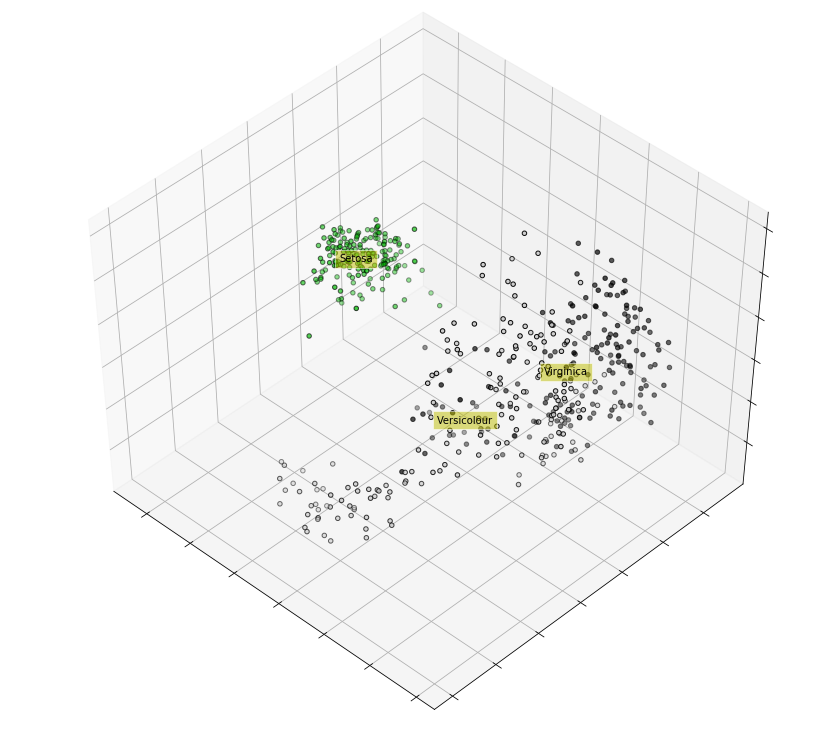

In [21]:
pca.fit(X)
X = pca.transform(X)

fig = plt.figure(1, figsize=(12, 10)) #設定圖示的大小
plt.clf() # Clear figure
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134) #rect 作為定義圖表的[left, bottom, width, height]、 elev為俯視角、azim為側視角
plt.cla() # Clear axis


for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='y'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
# scatter是散點圖
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

# 設定座標軸的名稱
ax.w_xaxis.set_ticklabels([])  #設定x軸標籤名稱
ax.w_yaxis.set_ticklabels([])  #設定y軸標籤名稱
ax.w_zaxis.set_ticklabels([])  #設定z軸標籤名稱

plt.show()